In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Exploring the Bias Variance Tradeoff


## Step 1: Write a function `generate_data(N)` 

Write a function `generate_data(N)` that produces `N` samples from the following model

$$
p(s) = p(x,y) = p(y|x)p(x)
$$

with the following true" underlying polynomial noisy model

$$p(x) = \mathrm{Uniform}(-1,1)$$
$$p(y|x) = \mathrm{Normal}(\mu = f(x),\sigma = 0.2)$$
$$f(x) = \sum_i p_i x^i$$,

with $p_0 = -0.7, p_1 = 2.2, p_2 = 0.5, p_3 = 1.0$


Hint: you can use `np.polyval` to evaluate a polynomial with a fixed set of coefficients (but watch out for the order)

The function should return a array of `x` values and an array of `y` values

In [3]:
coeffs_true = [1.0,0.5,2.2,-0.7]
def generate_data(N):
    x = np.random.uniform(-1,1, size = N)
    y = np.polyval(coeffs_true,x)
    y = y + np.random.normal(0,0.2, size = N)
    return x,y

## Step 2: Plot Samples and Functions

Write a function `plot(ax,train_x,train_y,p_trained,p_true)` that
takes a matplotlib axis object and plots

* plot the true function 
* plot a second (trained or random) function 
* plot the samples 

In the end you should be able to call it like this:

```
f = plt.figure()
x,y = generate_data(10)
plot(f.gca(),x,y,np.random.normal(size = (4,)), p_true)
```

In [4]:
def plot(ax,train_x,train_y,p_trained,p_true):
    xi = np.linspace(-1,1,1001)
    yi = np.polyval(coeffs_true,xi)
    ax.plot(xi,yi,label = 'true')
    yi = np.polyval(p_trained,xi)
    ax.plot(xi,yi,label = 'trained')
    ax.scatter(train_x,train_y, alpha = 0.2, c = 'k')
    ax.set_ylim(-4,4)
    ax.legend()

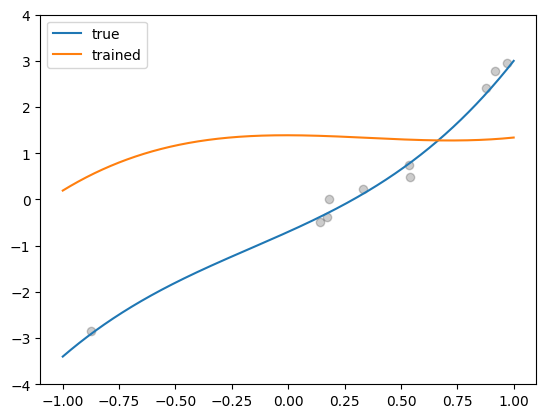

In [12]:
f = plt.figure()
x,y = generate_data(10)
plot(f.gca(),x,y,np.random.normal(size = (4,)), coeffs_true)

## Step 3

One can show that given a Hypothesis Set of Polynomial functions

$$f(x) = \sum_i w_i x^i$$

and a risk function of the following form

$$l(s) = l(x,y) = (y - f(x))^2$$

there is a closed form solution for finding the empirical risk minimization, where the best fit coefficients $\vec{w}$ is given by

$$
w = (X^T X)^{-1} X^T y
$$

where $X$ is the matrix with rows $(x^0,x^1,x^2,x^3,\dots,x^d)$ and one row for each sample

$$
X = \left(
\begin{array}{}
x_1^0,\dots,x_1^d  \\
x_2^0,\dots,x_2^d  \\
\dots \\
x_n^0,\dots,x_n^d  \\
\end{array}
\right)
$$

* Write a function `learn(train_x, train_y, degree)` to return the $(d+1)$ optimal coefficients for a polynomial fit of degree $d$.
* Fit a sampled of 5 data points with degree 4
* Plot the Trained function together with the true function using the plotting method from the last step
* Try this multiple time to get a feel for how much the data affects the fit
* Try degree 1 and observe how the trained function is much less sensitive to the data

[ 0.790641   -0.51326548  0.04558087  0.14050738  0.56181764]
[[ 3.90766501e-01  4.94240118e-01  6.25113191e-01  7.90641000e-01
   1.00000000e+00]
 [ 6.94014013e-02 -1.35215407e-01  2.63441457e-01 -5.13265484e-01
   1.00000000e+00]
 [ 4.31648667e-06  9.46995255e-05  2.07761562e-03  4.55808690e-02
   1.00000000e+00]
 [ 3.89759320e-04  2.77394204e-03  1.97423231e-02  1.40507377e-01
   1.00000000e+00]
 [ 9.96280180e-02  1.77331594e-01  3.15639063e-01  5.61817642e-01
   1.00000000e+00]]
[-0.35806515  0.66566336  0.15171924 -0.40227658 -0.98505483]
[[ 1.64379707e-02 -4.59077651e-02  1.28210650e-01 -3.58065147e-01
   1.00000000e+00]
 [ 1.96344442e-01  2.94960567e-01  4.43107710e-01  6.65663361e-01
   1.00000000e+00]
 [ 5.29861858e-04  3.49238403e-03  2.30187284e-02  1.51719242e-01
   1.00000000e+00]
 [ 2.61877987e-02 -6.50989892e-02  1.61826446e-01 -4.02276579e-01
   1.00000000e+00]
 [ 9.41546178e-01 -9.55831235e-01  9.70333024e-01 -9.85054833e-01
   1.00000000e+00]]
[-0.89065655  0.03324934

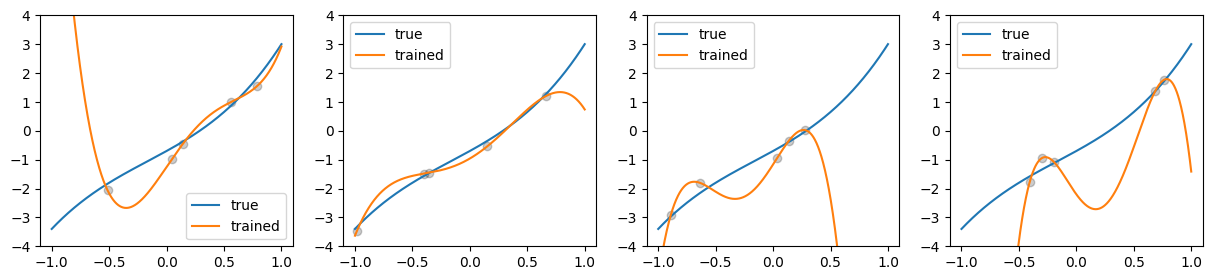

In [14]:
def learn(train_x, train_y, degree):
    print(train_x)
    X = np.column_stack([train_x**d for d in reversed(range(degree+1))])
    print(X)
    return np.linalg.inv(X.T @ X) @ X.T @ train_y

f,axarr = plt.subplots(1,4)
# run multiple tries, see data dependence
for ax in axarr.ravel():
    x,y = generate_data(5)
    coeffs = learn(x,y,degree = 4)
    plot(ax,x,y,coeffs, coeffs_true)
f.set_size_inches(15,3)

## Step 4

Write a function to evaluate the risk or loss of a sample. Use our loss function for which we have the training procedure above

$$
l(s) = l(x,y) = (y - f(x))^2
$$

and right a function `risk(x,y_true, trained_coeffs)` to cmpute

$$
\hat{L} = \frac{1}{N}\sum_i l(s_i) = \frac{1}{N}\sum_i l(x,y) = \frac{1}{N}\sum_i (y - f(x))^2
$$

* Draw a size 100 data sample and fit the result to obtain trained coefficients
* Draw 10000 samples of size 10 and compute their empirical risk under the trained coefficients
* Repeat the same but use the true coefficients of the underlying data-generating process
* Histogram the two sets of 10,000 risk evaluations. Which one has lower average risk?

In [7]:
def risk(x,y_true,p):
    predicted = np.polyval(p,x)
    return ((y_true-predicted)**2).mean()

[[ 0.78651098 -0.83517713  0.88685455 -0.94172955  1.        ]
 [ 0.37288557 -0.4771794   0.61064357 -0.78143686  1.        ]
 [ 0.87301537  0.90316358  0.93435292  0.96661932  1.        ]
 [ 0.00669706  0.02341063  0.08183556  0.28606915  1.        ]
 [ 0.9847866  -0.98856812  0.99236415 -0.99617476  1.        ]
 [ 0.06534263 -0.12924015  0.25562204 -0.50559078  1.        ]
 [ 0.35105847 -0.45607324  0.59250187 -0.76974143  1.        ]
 [ 0.12387768  0.20880687  0.35196261  0.59326437  1.        ]
 [ 0.00970027 -0.0309092   0.09848993 -0.31383106  1.        ]
 [ 0.38616557 -0.48986923  0.62142222 -0.78830338  1.        ]]


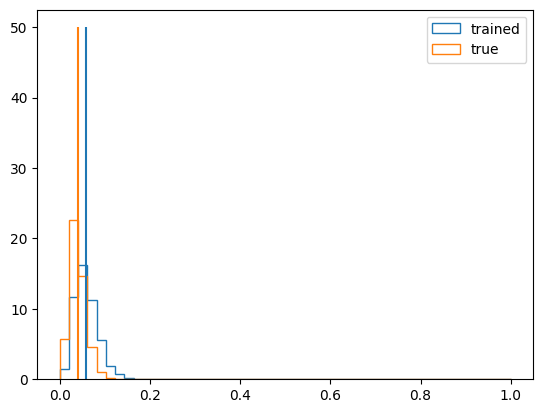

In [8]:
coeffs_trained = learn(*generate_data(10), degree = 4)

risk_trained = np.array([risk(*generate_data(10), p = coeffs_trained) for i in range(10000)])
risk_true = np.array([risk(*generate_data(10), p = coeffs_true) for i in range(10000)])

bins = np.linspace(0,1)
plt.hist(risk_trained, bins = bins, histtype = 'step', label = 'trained', density = True);
plt.hist(risk_true, bins = bins, histtype = 'step', label = 'true', density = True);
plt.legend()
plt.vlines(risk_trained.mean(),0,50,colors = 'C0')
plt.vlines(risk_true.mean(),0,50,colors = 'C1')

## Step 5

Explore how the fit improves when adding more data. Plot the best fit model for data set sizes of 

$$N = 5,10,100,200,1000$$

[[ 4.23770316e-04  2.95357429e-03  2.05856823e-02  1.43477114e-01
   1.00000000e+00]
 [ 6.31908808e-01 -7.08746303e-01  7.94926920e-01 -8.91586743e-01
   1.00000000e+00]
 [ 5.11545659e-02  1.07563098e-01  2.26173752e-01  4.75577283e-01
   1.00000000e+00]
 [ 1.85760182e-01  2.82953110e-01  4.30999052e-01  6.56505180e-01
   1.00000000e+00]
 [ 1.79520439e-02 -4.90439484e-02  1.33985238e-01 -3.66039940e-01
   1.00000000e+00]]
[[ 6.66577976e-02  1.31186220e-01  2.58181714e-01  5.08115847e-01
   1.00000000e+00]
 [ 9.05725414e-01 -9.28426259e-01  9.51696072e-01 -9.75549113e-01
   1.00000000e+00]
 [ 4.97894449e-02 -1.05402998e-01  2.23135486e-01 -4.72372190e-01
   1.00000000e+00]
 [ 2.44257109e-02 -6.17853355e-02  1.56287270e-01 -3.95331848e-01
   1.00000000e+00]
 [ 8.70143572e-01 -9.00934436e-01  9.32814865e-01 -9.65823413e-01
   1.00000000e+00]
 [ 6.96342503e-05 -7.62284656e-04  8.34471391e-03 -9.13494057e-02
   1.00000000e+00]
 [ 5.05225460e-07  1.89502054e-05  7.10792135e-04  2.66606852e-0

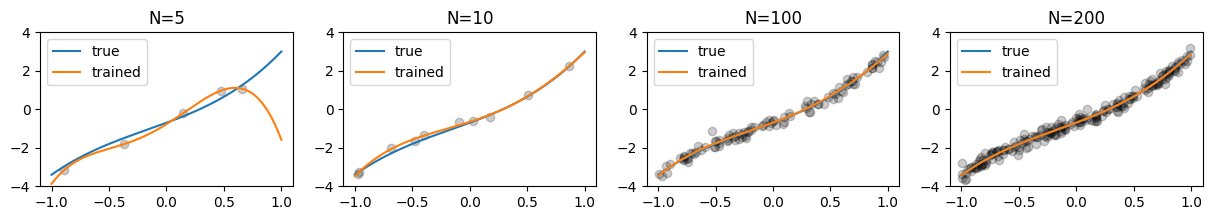

In [9]:
f,axarr = plt.subplots(1,4)

for ax,N in zip(axarr.ravel(),[5,10,100,200,1000]):
    train_x,train_y = generate_data(N)
    coeffs_trained = learn(train_x,train_y,4)
    plot(ax,train_x,train_y,coeffs_trained,coeffs_true)
    ax.set_title(f'N={N}')
f.set_size_inches(15,2)

## Step 6

Explore how the fit changes when using more and more complex models. Plot the best fit model for degrees

$$d = 1,2,5,10$$

[[ 0.50064769  1.        ]
 [ 0.90838891  1.        ]
 [-0.82378087  1.        ]
 [ 0.09398989  1.        ]
 [-0.3254826   1.        ]
 [-0.49748291  1.        ]
 [ 0.81275897  1.        ]
 [ 0.31472566  1.        ]
 [ 0.88536234  1.        ]
 [ 0.69080785  1.        ]]
[[ 0.25064811  0.50064769  1.        ]
 [ 0.82517041  0.90838891  1.        ]
 [ 0.67861492 -0.82378087  1.        ]
 [ 0.0088341   0.09398989  1.        ]
 [ 0.10593892 -0.3254826   1.        ]
 [ 0.24748925 -0.49748291  1.        ]
 [ 0.66057714  0.81275897  1.        ]
 [ 0.09905224  0.31472566  1.        ]
 [ 0.78386646  0.88536234  1.        ]
 [ 0.47721549  0.69080785  1.        ]]
[[ 3.14529287e-02  6.28244756e-02  1.25486398e-01  2.50648111e-01
   5.00647692e-01  1.00000000e+00]
 [ 6.18527639e-01  6.80906200e-01  7.49575644e-01  8.25170407e-01
   9.08388907e-01  1.00000000e+00]
 [-3.79366094e-01  4.60518212e-01 -5.59029991e-01  6.78614922e-01
  -8.23780870e-01  1.00000000e+00]
 [ 7.33509442e-06  7.80413129e-05  

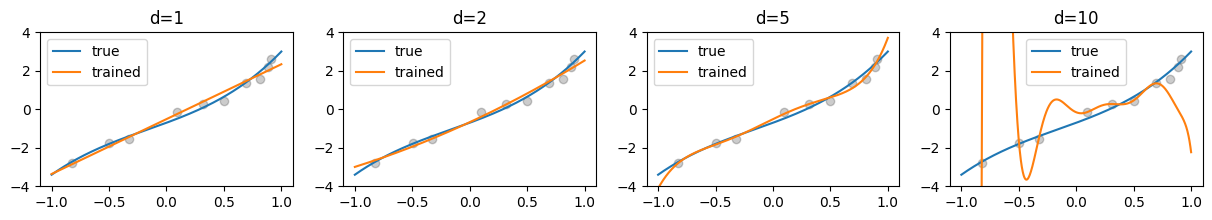

In [10]:
f,axarr = plt.subplots(1,4)
train_x,train_y = generate_data(10)

for ax,degree in zip(axarr.ravel(),[1,2,5,10]):
    coeffs_trained = learn(train_x,train_y,degree)
    plot(ax,train_x,train_y,coeffs_trained,coeffs_true)
    ax.set_title(f'd={degree}')
f.set_size_inches(15,2)

## Step 7 Bias-Variance Tradeoff

Draw two datasets:

* A train dataset with $N=10$
* A test dataset with $N=1000$

Perform trainings on the train dataset for degrees $1\dots8$ and store the training coefficients

* Evaluate the risk under the various trainings for the train and the test dataset
* Plot the train and test risk as a function of the polynomial degree

[[ 0.82541146  1.        ]
 [ 0.60357538  1.        ]
 [ 0.79301784  1.        ]
 [-0.72011123  1.        ]
 [-0.09140963  1.        ]
 [ 0.54971006  1.        ]
 [-0.35277188  1.        ]
 [ 0.00569377  1.        ]
 [ 0.07970934  1.        ]
 [ 0.65330938  1.        ]]
[[ 6.81304073e-01  8.25411457e-01  1.00000000e+00]
 [ 3.64303240e-01  6.03575381e-01  1.00000000e+00]
 [ 6.28877297e-01  7.93017841e-01  1.00000000e+00]
 [ 5.18560190e-01 -7.20111234e-01  1.00000000e+00]
 [ 8.35572004e-03 -9.14096277e-02  1.00000000e+00]
 [ 3.02181151e-01  5.49710061e-01  1.00000000e+00]
 [ 1.24448002e-01 -3.52771884e-01  1.00000000e+00]
 [ 3.24189659e-05  5.69376553e-03  1.00000000e+00]
 [ 6.35357923e-03  7.97093422e-02  1.00000000e+00]
 [ 4.26813151e-01  6.53309383e-01  1.00000000e+00]]
[[ 5.62356188e-01  6.81304073e-01  8.25411457e-01  1.00000000e+00]
 [ 2.19884467e-01  3.64303240e-01  6.03575381e-01  1.00000000e+00]
 [ 4.98710916e-01  6.28877297e-01  7.93017841e-01  1.00000000e+00]
 [-3.73421018e-01

Text(0, 0.5, 'risk')

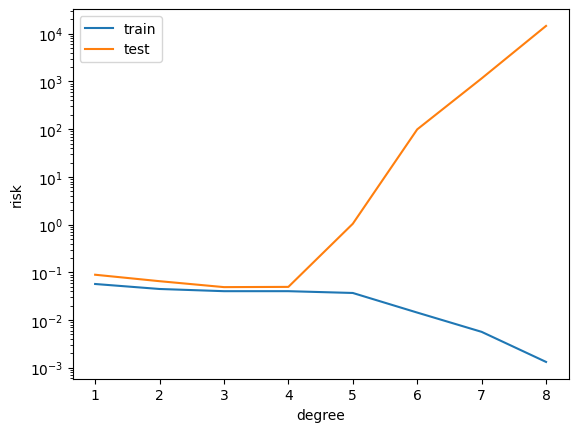

In [11]:
train_x,train_y = generate_data(10)
test_x,test_y = generate_data(1000)


degrees = range(1,9)
trainings = [learn(train_x,train_y,d) for d in degrees]

a = [risk(train_x,train_y,t) for t in trainings]
b = [risk(test_x,test_y,t) for t in trainings]
plt.plot(degrees,a, label = 'train')
plt.plot(degrees,b, label = 'test')
plt.legend()
plt.semilogy()
plt.xlabel('degree')
plt.ylabel('risk')